## A. Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [95]:
data_train = pd.read_csv('fashion_mnist/fashion-mnist_train.csv')

X = np.array(data_train.iloc[:, 1:])
y = np.array(data_train.iloc[:, 0])

In [93]:
def plot_image(img, img_rows=28, img_cols=28):
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img,cmap='gray')
    plt.colorbar()
    plt.grid(False)

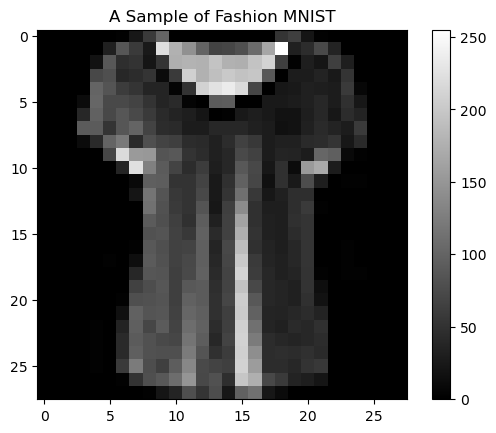

In [96]:
plot_image(X[41])
plt.title('A Sample of Fashion MNIST')
plt.savefig('assets/Q5_sample.png')

## B. Standardization

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## C. Covariance Matrix

In [24]:
cov = np.cov(X.T)
print("Covariance matrix shape:", cov.shape)

Covariance matrix shape: (784, 784)


## D. Eigenvalues & Eigenvectors

In [25]:
eig_values, eig_vectors = np.linalg.eig(cov)

In [40]:
def plot_eigen_values(eig_values, number_of_eig=None):
    if number_of_eig == None:
        number_of_eig = len(eig_values)
    sorted_eig_values = -np.sort(-eig_values)
    plt.plot(sorted_eig_values[:number_of_eig])
    plt.grid()
    plt.ylabel('Eigen value')
    plt.xlabel('k-th eigen value')
    plt.title('Sorted Eigen Values')

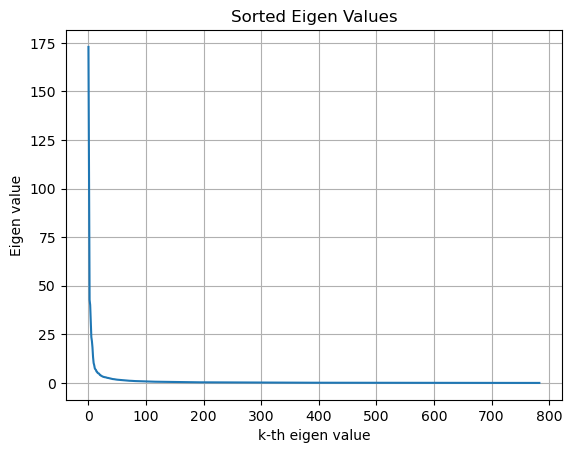

In [127]:
plot_eigen_values(eig_values)
plt.savefig('assets/Q5_eigen_values_784.png')

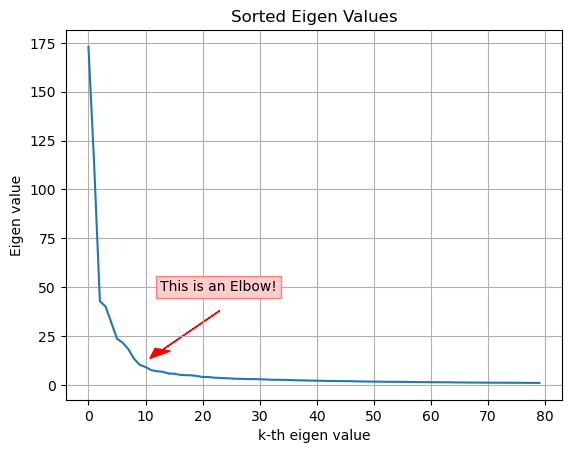

In [128]:
plot_eigen_values(eig_values, 80)
plt.arrow(23, 38, -10, -20, head_width=3, head_length=5, fc='r', ec='r')
plt.text(33, 48, "This is an Elbow!", ha="right", bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.savefig('assets/Q5_eigen_values_80.png')

## E. Compressing

In [90]:
W = eig_vectors[0:10,:].T
X_pca = np.matmul(X, W)

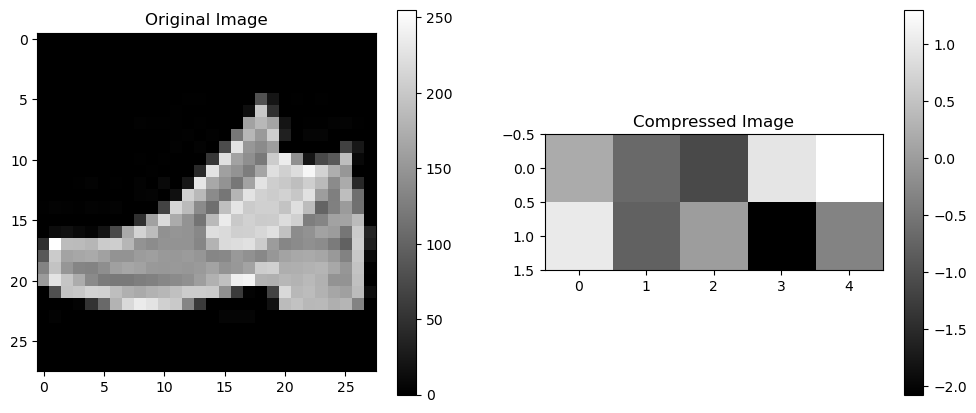

In [129]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_image(X[1])
plt.title('Original Image')

plt.subplot(1, 2, 2)
plot_image(X_pca[1], 2, 5)
plt.title('Compressed Image')

plt.savefig('assets/Q5_compressed.png')